# Project 3

## Part a

This problem indicates the propagation of a wave from the center, and it splits into 2 waves and each of those waves propagate in opposite directions from the center to the boundaries at speed of propagation of c. 

The boundary conditions are the statements that mention $u(0,t) = u(L,t) = 0$, which indicate that regardless of the time, the wave at the endpoints x=0 and x=L are always at 0 amplitude, akin to a guitar string being strummed from the center. 

The initial conditions are the statements that $u(x,0) = f(x)$, which indicate the form of the solution at the initial time, t = 0, and $u_t(x,0) = g(x)$ indicate how each and every part of the waveform changes with time at the instant t=0. 

## Part b,c & d | solver algorithm 

Our solver2 algorithm involves taking a given number of displacement steps to take - N, given number of time steps - M, total length of system - L and total time of wave motion - T. 

Following that, since we wish to see how the approximated solution looks like in intervals, **we set a variable named 'check' to be the number of timesteps the algorithm calculates, before stopping to plot the solution periodically**. If the given timestep is an integer multiple of the given 'check' variable, the algorithm plots the solution at that timestep, and does this again once it reaches the next integer multiple.

Following that, since there are undoubtedly instances when we wish to only see plots - without any outputted results at the end, others when we only wish **to see the final calculated approximation, we set a 'req' variable**. This variable, is by default set to 0, and at that setting, will not provide any output of the approximated solution at the final time step. If set to any value other than 0, it produces that output, as well as the x axis vector to plot against - X, the list of the timesteps at which the solution was stored into the list 'savedata' - 'dataindex'. Conceivably, one could choose to not have the solver2 algorithm automatically plot the solution at every single timestep, and instead, look through the saved data themselves. 

Following that, the algorithm also has a parameter **'c' where you can adjust the speed of the wave propagation for the wave**, which is set to 2 by default. This value is important to adjust to ensure to fulfill the Courant-Friedrichs-Lewy(CFL) condition. 

L0 and T0 are starting time and length parameters, in the offchance that one were interested in adjusting those to study the behaviour of a wave for a different time interval or space interval, which are both automatically set to be 0, and will not be experimented with in this project. 

Finally, the **'plot' parameter is by default set to equal to 1, which means that the algorithm will plot whenever the timestep is an integer multiple of 'check'**. Otherwise, the algorithm will only store the solution at that checkpoint value, but not plot it. If plot is set to 2, the algorithm will only plot at the final time step. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

def solver2(N, M, L, T,check,req = 0,  c = 2, L0 = 0, T0 = 0, plot = 1):
    deltat = (T-T0)/M
    deltax = (L-L0)/N
    #initialise
    uold = np.zeros(N)
    ucur = np.zeros(N)
    unew = np.zeros(N)
    for i in range(1, N):
        uold[i] = fi(i*deltax, L) - gi(i*deltax, L)*deltat
        ucur[i] = fi(i*deltax, L)
    #Set up c
    C2 = c*deltat/deltax
    print('CFL=',C2)
    savedata=[]
    dataindex = []
    for j in range(M): #Time
        for i in range(1,N-1): #Length
            unew[i]=2*ucur[i] - uold[i] + (C2**2.) *(ucur[i-1] - 2*ucur[i]+ucur[i+1]) + 0 #deltat**2. * ((i*deltax)**2.-(i*deltax)*L+2*c**2.)*np.sin(j*deltat)
        uold = np.copy(ucur)
        ucur = np.copy(unew)
        check = int(check)
        X = np.linspace(0, L, N)
        plt.xlim(L0,L)
        #Display limit system
        plt.ylim(-1,1)
        if (j%check==0) & (plot == 1):
            plt.plot(X, np.copy(uold), label = 'Approximation')
            plt.legend(loc = 'upper right')
            plt.show()
            savedata.append(np.copy(uold))
            dataindex.append(j)
        elif j%check==0:
            savedata.append(np.copy(uold))
            dataindex.append(j)
    if plot == 2:
        plt.plot(X, np.copy(unew), label = 'Approximation')
        plt.legend(loc = 'upper right')
        plt.show()
    if req == 0:
        return None
    else:
        return [savedata,dataindex, unew, X]

It is important to note that for convergence to occur, one needs to notethe Courant-Friedrichs-Lewy(CFL) condition, whereby

$$ C = c\frac{\Delta t}{\Delta x} < 1 $$

in order for convergence of solutions to take place (C and C2 are being used to denote the same thing). The code does allow one to directly experiment with this value. 

## Part e | Testing the code

Since we are testing the code for a given exact solution

$$ u(x,t) = x(L-x)sin(t) $$

$$ \therefore u_{tt} - c^2u_{xx} = -x(L-x)sin(t) + 2c^2sin(t) = (x^2 -xL + 2c^2)sin(t) $$

By method of finite differences, our model to estimate the known solution is as follows

$$ u_{tt} - c^2u_{xx} = (x^2 -xL + 2c^2)sin(t)  $$

$$ \frac{u_i^{n+1} - 2u_i^n + u_i^{n-1}}{\Delta t^2} - c^2 \cdot \frac{u^n_{i+1} - 2u_i^n + u^n_{i-1}}{\Delta x^2} = (x^2 -xL + 2c^2)sin(t) $$

Therefore, in order to find the next iteration through our time step (represented by $u_i^{n+1}$), 

$$ u_i^{n+1} = 2u_i^n - u_i^{n-1} +  c^2 \cdot \frac{\Delta t^2}{\Delta x^2}  (u^n_{i+1} - 2u_i^n + u^n_{i-1}) + \Delta t^2 \cdot (x^2 -xL + 2c^2)sin(t) $$

We edit the iteration line in our code to simply reflect this

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
def solvere(N, M, L, T,check, req=0,  c = 2, L0 = 0, T0 = 0, plot = 1):
    deltat = (T-T0)/(M)
    deltax = (L-L0)/(N-1)
    #initialise
    uold = np.zeros(N)
    ucur = np.zeros(N)
    unew = np.zeros(N)
    #Set up c
    C2 = c*deltat/deltax
    # print('CFL=',C2)
    for i in range(1, N-1):
        uold[i] = fi(i*deltax, L) - gi(i*deltax, L)*deltat
        ucur[i] = fi(i*deltax, L)
        unew[i] = ucur[i] - gi(i*deltax, L) * deltat + .5*C2**2.*(ucur[i+1] -2.*ucur[i] + ucur[i-1]) + .5*deltat**2. * ((i*deltax)**2.-(i*deltax)*L+2*c**2.)*np.sin(1*deltat)
    uold = np.copy(ucur)
    ucur = np.copy(unew)
        
    for j in range(1,M): #Time
        for i in range(1,N-1): #Length
            unew[i]=2*ucur[i] - uold[i] + (C2**2.) *(ucur[i-1] - 2*ucur[i]+ucur[i+1]) + deltat**2. * ((i*deltax)**2.-(i*deltax)*L+2*c**2.)*np.sin(j*deltat)
        uold = np.copy(ucur)
        ucur = np.copy(unew)
        check = int(check)
        savedata=[]
        dataindex = []
        X = np.linspace(0, L, N)
        if (plot == 1) or (plot ==2):
            #Display limit system
            if L >= L**2./4:
                plt.ylim(-L,L)
            else:
                plt.ylim(-L**2./4, L**2./4)
        if (j%check==0) & (plot == 1):
            #print(j)
            plt.xlim(L0,L)
            plt.plot(X, g_a(X,deltat*j,L), label = 'Actual Solution')
            plt.plot(X, np.copy(uold), label = 'Approximation')
            plt.legend(loc = 'upper right')
            plt.show()
            savedata.append(np.copy(uold))
            dataindex.append(j)
            
    if plot == 2:
        plt.plot(X, g_a(X,T,L), label = 'Actual Solution')
        plt.plot(X, np.copy(unew), label = 'Approximation')
        plt.legend(loc = 'upper right')
        plt.show()
    if req == 0:
        return None
    else:
        return [savedata,dataindex,C2, unew, X]

Since we are only asked to plot the final solution for different values of N, we turn off the default plot functionality, and only request for the final plots.

Let us begin by considering 10 points along the x axis, then 6,20,100 and 200 - after defining our boundary and initial conditions, specific to the case when the exact solution is $u = x(L-x)sin(t)$.

In [3]:
def fi(x, L):    #Initial condition of waveform at time 0
    return 0

def gi(x, L):    #Initial rate of change condition of waveform at time 0
    function = x*(L-x)
    return function

#Actual solution to compare to

def g_a(x, t, L):
    return x*(L-x)*np.sin(t)

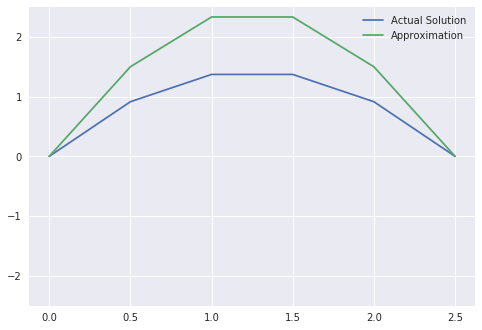

In [4]:
solvere(N=6,M=10000,L=2.5,T=20,check = 10,req=0, c =1.5, L0 = 0, T0 = 0, plot = 2)

As is evident above, the actual solution and approximation have a rather large discrepancy. Consider higher N values. 

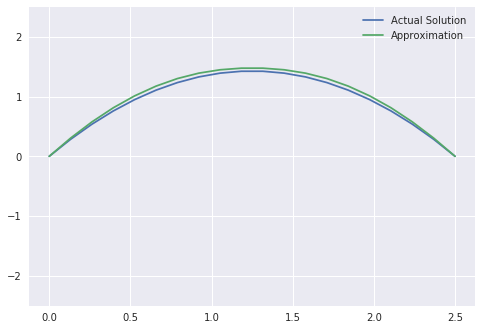

In [28]:
solvere(20,10000,2.5,20,10,req=0, c =1.5, L0 = 0, T0 = 0, plot = 2)

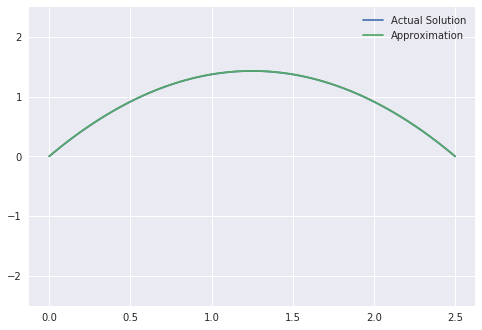

In [30]:
solvere(100,10000,2.5,20,10,req=0, c =1.5, L0 = 0, T0 = 0, plot = 2)

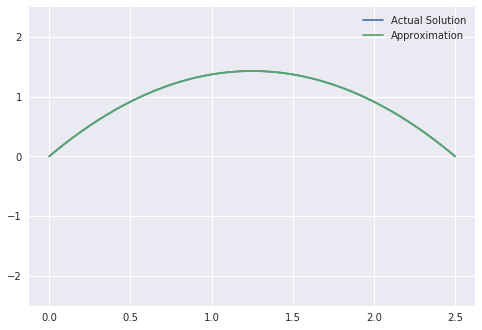

In [5]:
solvere(200,10000,2.5,20,10,req=0, c =1.5, L0 = 0, T0 = 0, plot = 2)

The solution converges very strongly at values of N higher than 20.

## Part f | Rate of convergence

We are going to be constructing error norms for the final time steps. Defaulting L=3 and t=20 which is the final time step used for part e when comparing with our sample exact solution.  For possible further study, we default M to be 500, but as a variable that can be changed in the error function, in case that affects the norm.  All default values are the ones used previously in part e. 

In [7]:
def g_a(x, t, L):
    return x*(L-x)*np.sin(t)

def E(N,t=20,L=2.5, M=5000, c=1.5):
    err2 = 0
    deltax = (L-0)/(N-1)
    deltat = t/M
    X = np.linspace(0, L, N)
#solvere(N, M, L, T,check, req=0,  c = 2, L0 = 0, T0 = 0, plot = 1)
    err2 = np.sum( (g_a(X, t, L) - solvere(N,M,L,t,10,1,c , L0 = 0, T0 = 0, plot = 0)[-2] )**2.)
    err2 *= deltax
    err2 = np.sqrt(err2)

    C2 = solvere(N,M,L,t,10,1,c , L0 = 0, T0 = 0, plot = 0)[-3]


    return [err2,C2]

def r(N1,N2,t=20, L=2.5 ,M=5000,c=1.5):
    deltax1 = L/N1
    deltax2 = L/N2
    func = np.log(E(N2, t, L, M,c)[0]/E(N1, t, L, M,c)[0])
    func /= np.log(deltax2/deltax1)
    return [func,E(N2, t, L, M,c)[0],E(N1, t, L, M,c)[0], E(N2, t, L, M,c)[1], E(N1, t, L, M,c)[1]]

In [41]:
for i in range(7):
    print("Convergence ratio of {:.5f} returned, with CFT term C being {:.2f} for N={:d} and {:.2f} for N={:d} ".format( r(3*2**i,3*2**(i+1))[0], r(3*2**i,3*2**(i+1))[-2] , 3*2**(i+1) , r(3*2**i,3*2**(i+1))[-1] , 3*2**i ))

Convergence ratio of 0.08177 returned, with CLT term C being 0.01 for N=6 and 0.00 for N=3 
Convergence ratio of 2.19882 returned, with CLT term C being 0.03 for N=12 and 0.01 for N=6 
Convergence ratio of 2.06795 returned, with CLT term C being 0.06 for N=24 and 0.03 for N=12 
Convergence ratio of 2.04305 returned, with CLT term C being 0.11 for N=48 and 0.06 for N=24 
Convergence ratio of 2.06796 returned, with CLT term C being 0.23 for N=96 and 0.11 for N=48 
Convergence ratio of 2.26597 returned, with CLT term C being 0.46 for N=192 and 0.23 for N=96 
Convergence ratio of 4.37490 returned, with CLT term C being 0.92 for N=384 and 0.46 for N=192 


The convergence ratio appears to converge (to an extent) to a value of 2 until larger end of N values are used, starting with N $\ge$ 200. This appears to tie the fact that at higher values of the CFL value, as mentioned before, above a certain threshold, the solution ceases to converge. At values above 1, the algorithm starts producing overflow values (values above the large number threshold), and approximations be come undefined. 

However, it is worth noting that the convergence ratio ceases to approach zero at values of C above $\sim 0.2$, which is still typically considered a very acceptable value for C to conduct this approximation. 

## Part g | Experimental Rate of convergence 

The experimental rate of convergence is the rate at which the discrepancy between the actual solution and the approximation change with respect to the size of the iterative steps taken to approximate said solution. 

## Part h

In [3]:
def fi(x, L):    #Initial condition of waveform at time 0
    return np.exp(-4*(x-5)**2.)

def gi(x, L):    #Initial rate of change condition of waveform at time 0
    function = 0
    return function

We now use our original solver2 function to visualise how the solution behaves with time. As stated before,  in order for c=5, L=10, and T=50, M/N = 50 are as such while C2=0.5, we went with N=100 and M=5000 as shown in the first 2 arguments of the solver2 function. We decide to set the check function to 100, which means that the function will plot a graph every 100 steps, showing how the function appears to behave. 

CFL= 0.19999999999999998


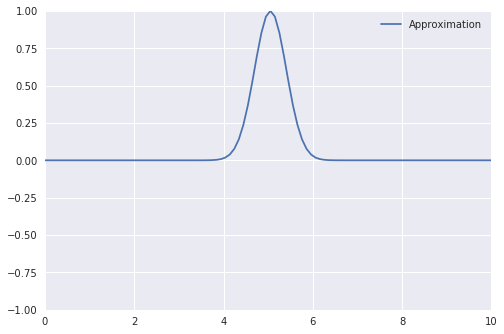

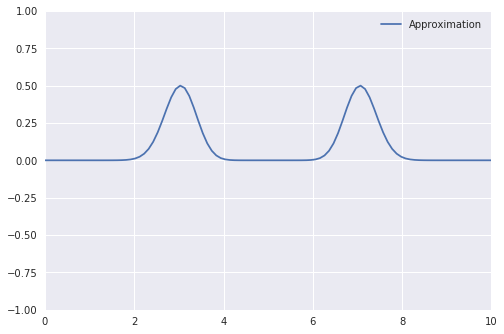

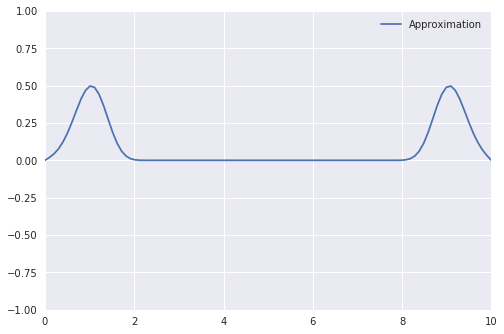

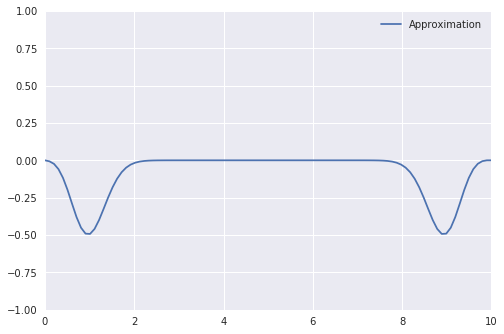

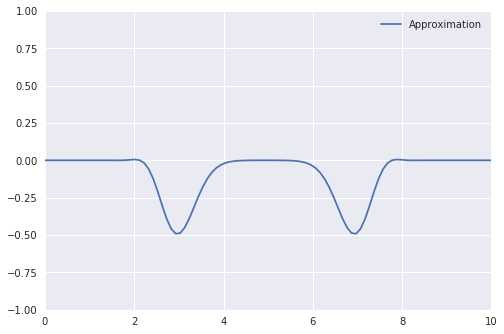

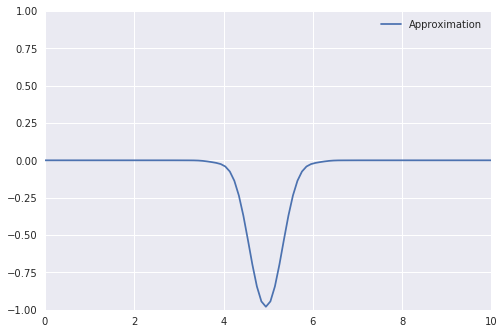

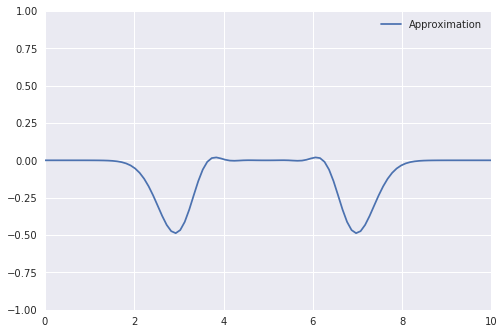

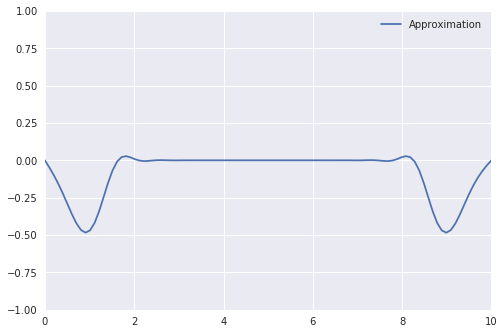

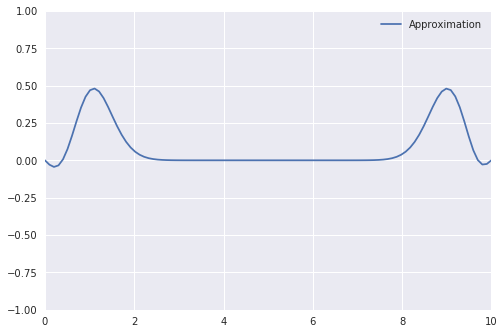

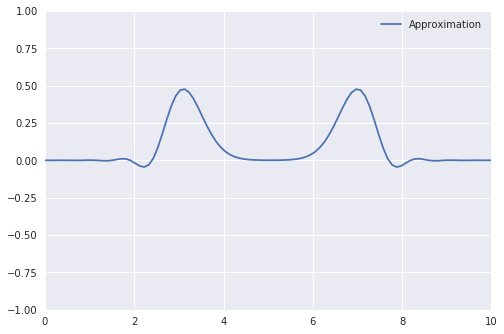

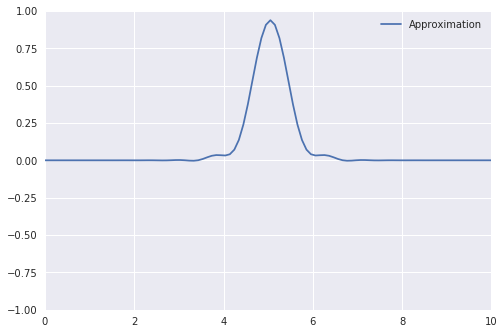

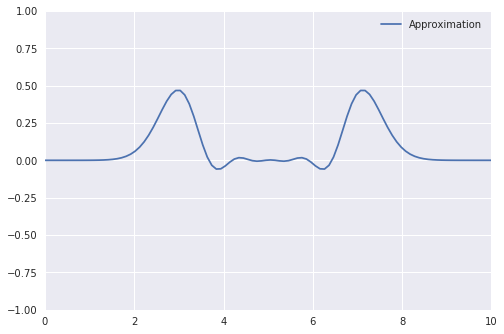

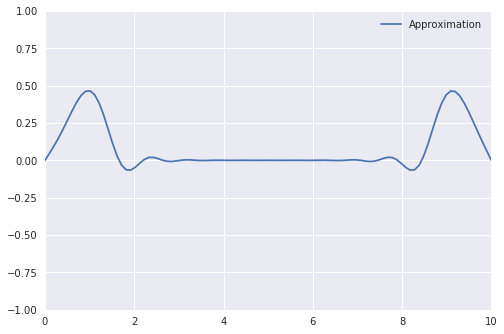

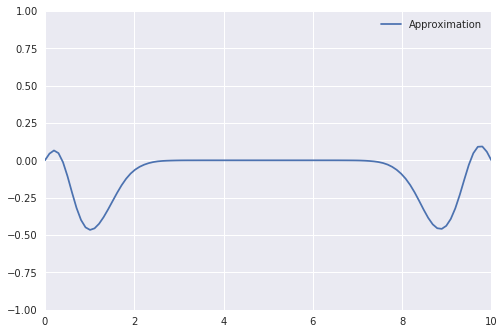

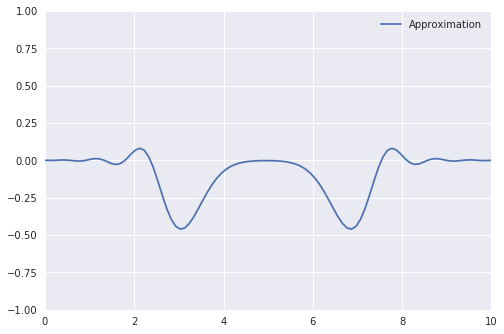

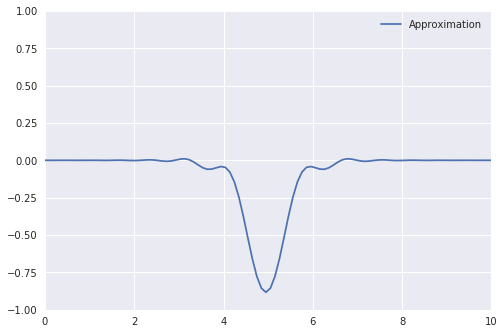

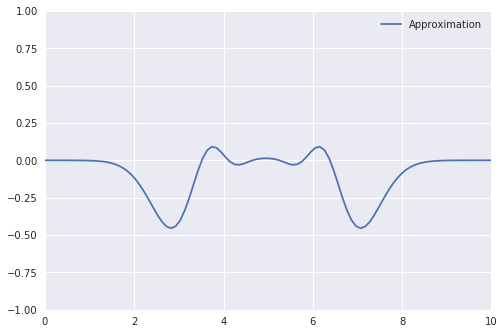

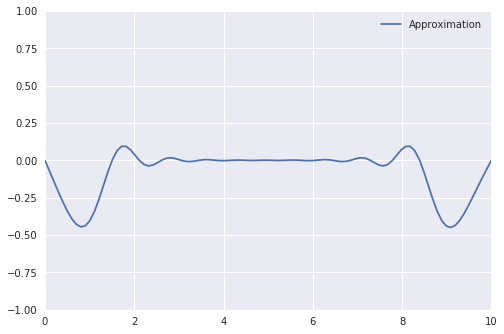

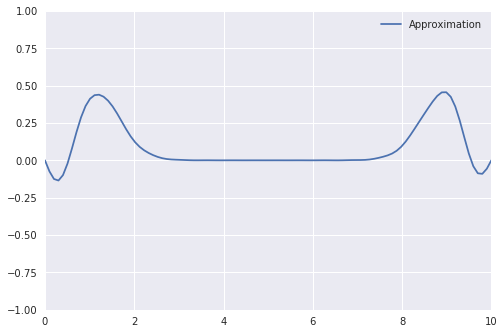

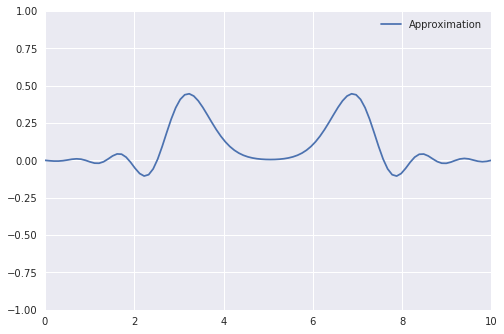

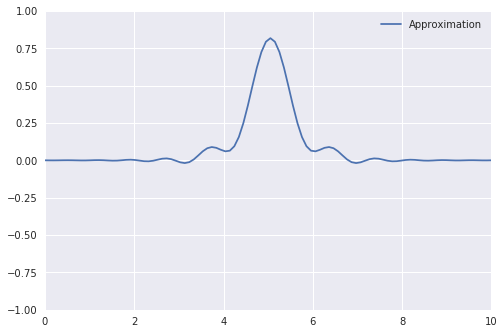

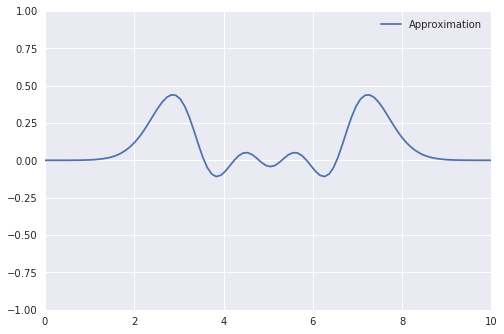

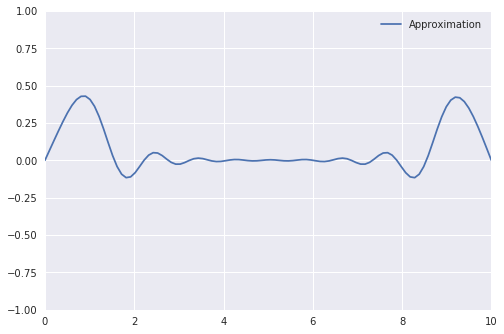

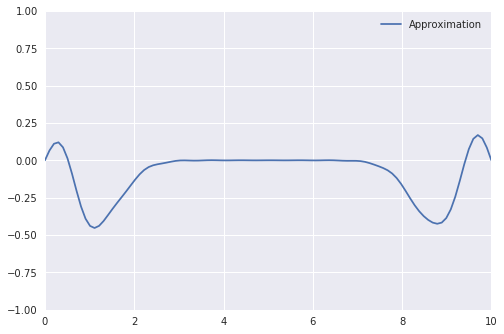

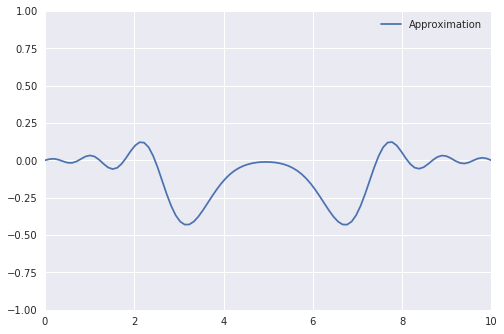

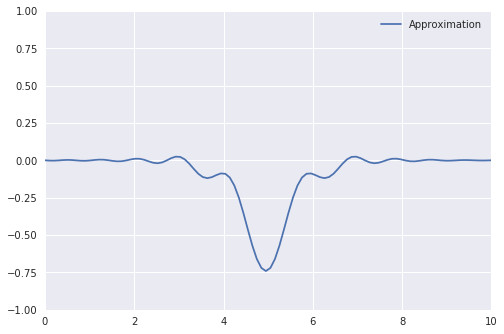

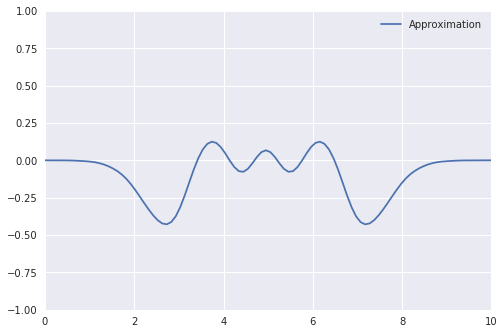

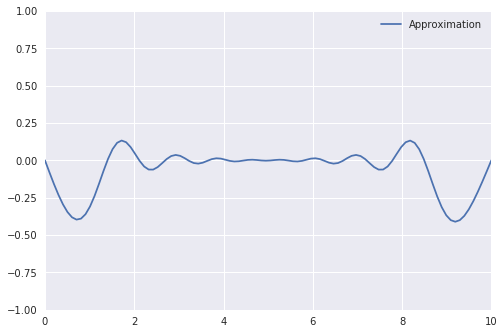

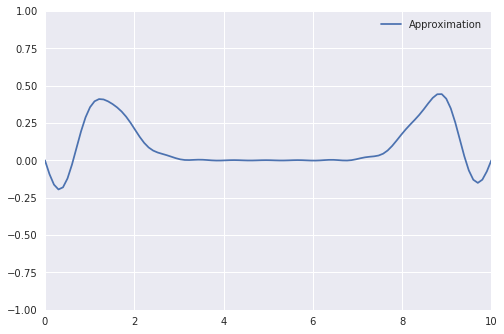

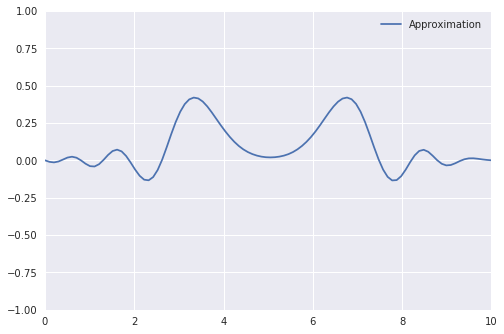

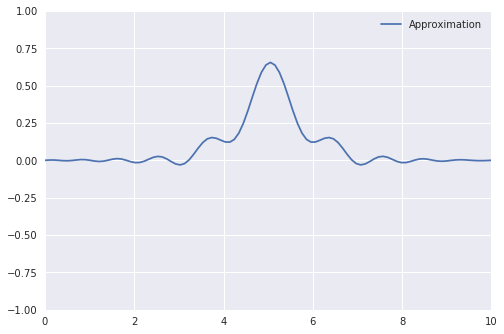

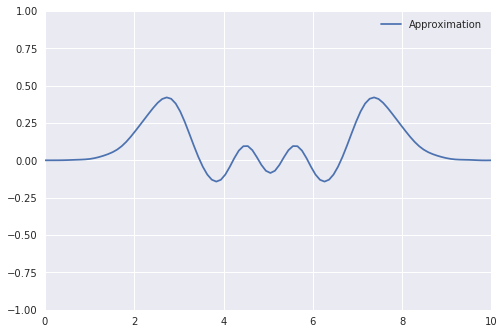

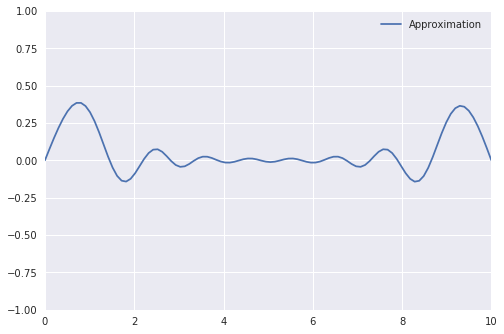

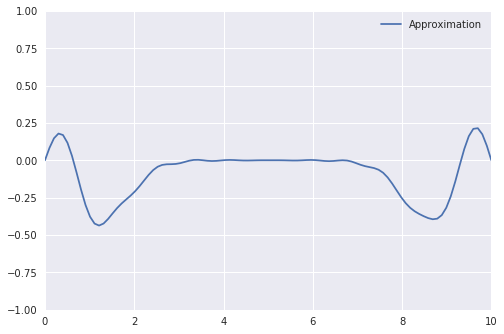

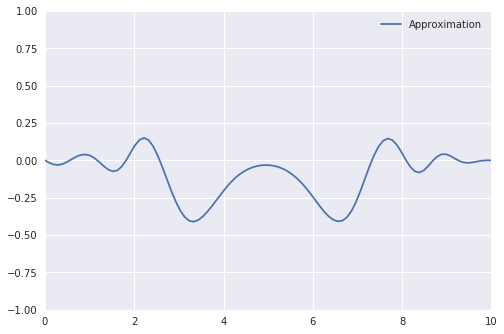

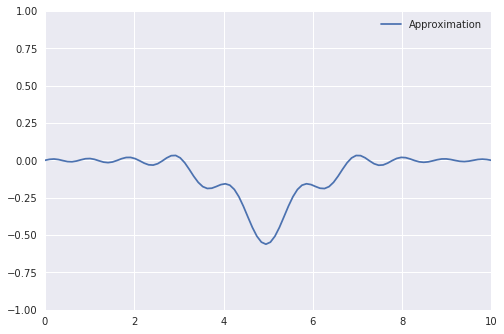

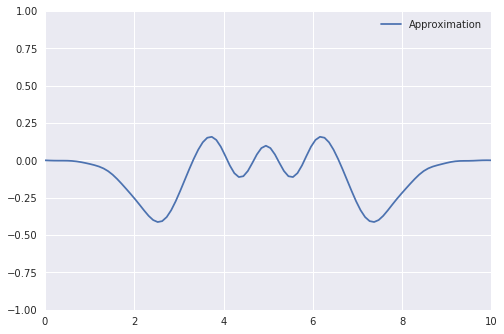

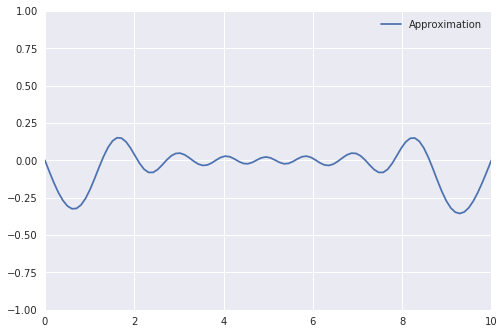

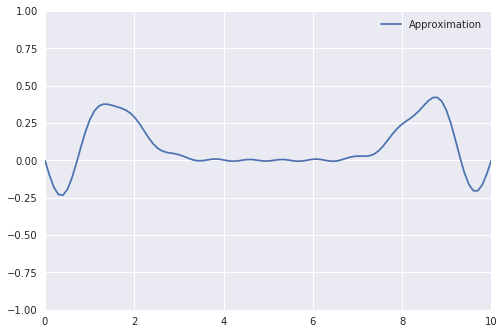

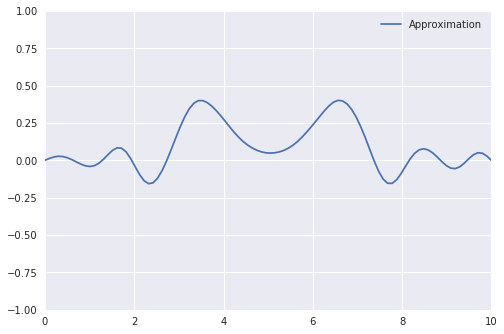

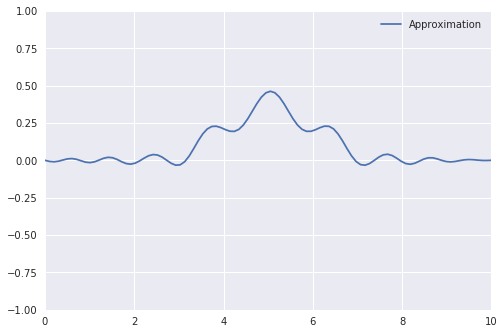

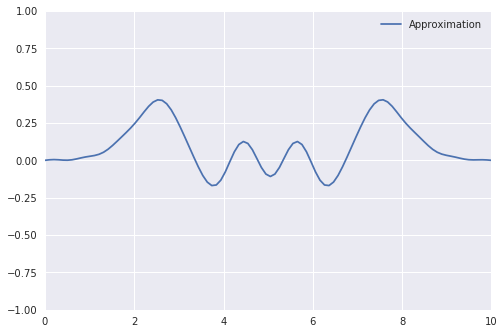

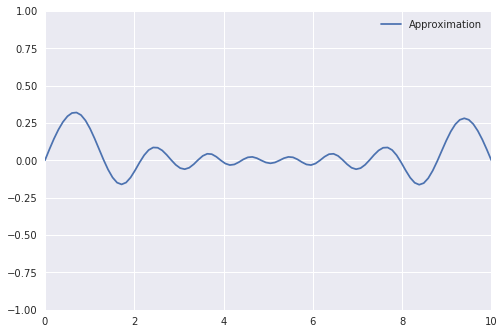

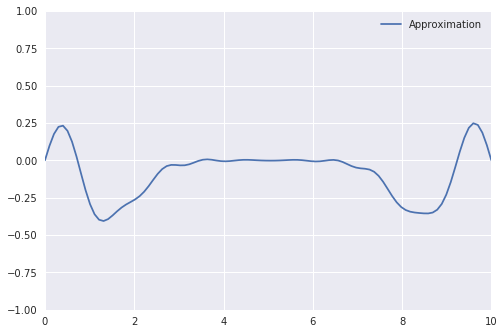

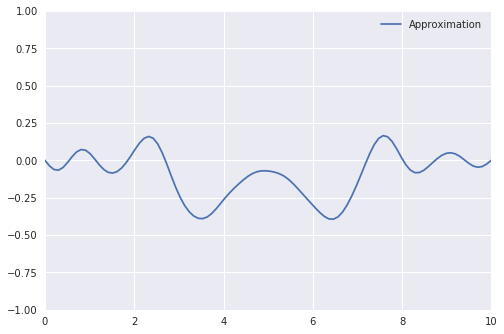

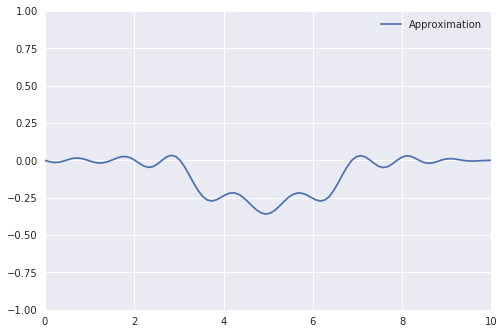

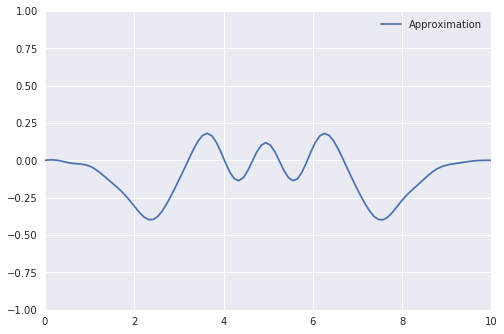

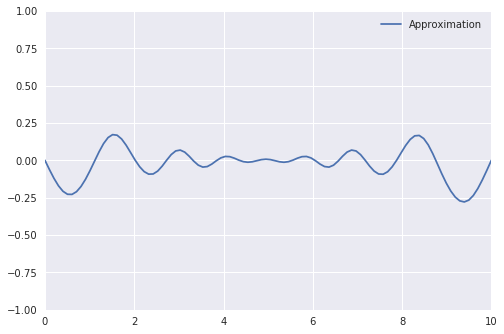

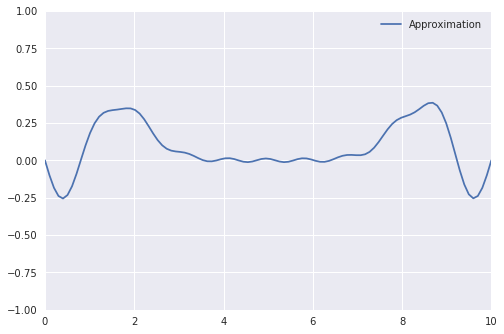

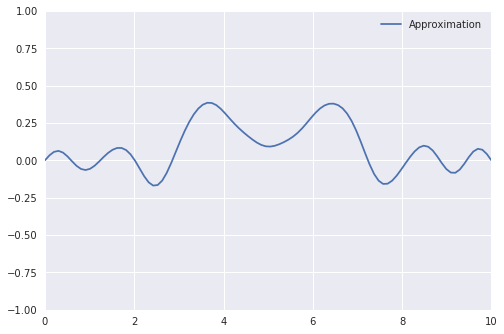

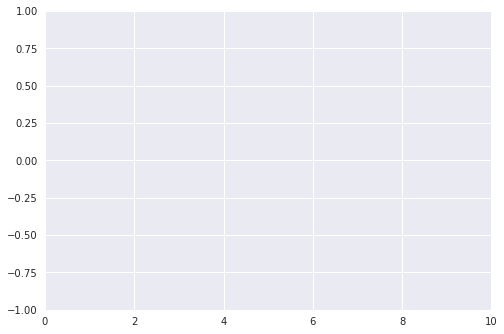

In [4]:
solver2(100,5000,10,50,100)

This function, as expected appears to replicate a wave that starts with a perturbance in the middle of the profile, and splits into 2 waves, and continuously bounces off the boundaries on either side of the profile, changing polarities and bouncing back and forth. However, with every cycle, the waves end up becoming more and more attenuated and distort, resulting in smaller and smaller amplitudes, and various smaller waveforms coalescing with the main waveforms, as a result of said apparent attenuation. 